In [4]:
pip install vega_datasets

     |████████████████████████████████| 210 kB 4.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [14]:
%matplotlib inline
import matplotlib.pyplot as plt


In [16]:
plt.style.use('seaborn-whitegrid')

In [3]:
import numpy as np
from vega_datasets import data 

In [4]:
data.seattle_weather().head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [5]:
data.seattle_weather().set_index('date').head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


In [6]:
data.seattle_weather().set_index('date')['precipitation'].head()

date
2012-01-01     0.0
2012-01-02    10.9
2012-01-03     0.8
2012-01-04    20.3
2012-01-05     1.3
Name: precipitation, dtype: float64

In [7]:
#rainfall in 2015 in Seattle
rainfall_mm = data.seattle_weather().set_index('date')['precipitation']['2015']
rainfall_mm.head()

date
2015-01-01     0.0
2015-01-02     1.5
2015-01-03     0.0
2015-01-04    10.2
2015-01-05     8.1
Name: precipitation, dtype: float64

In [13]:
#Num of days in 2015 for which rain was recorded
len(rainfall_mm)

365

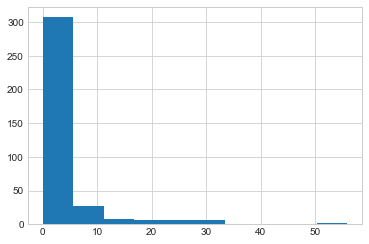

In [17]:
plt.hist(rainfall_mm);

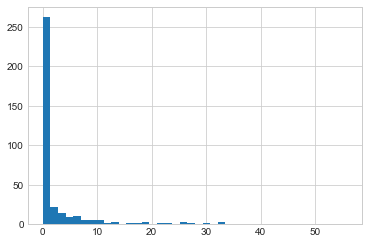

In [18]:
plt.hist(rainfall_mm,40);

In [19]:
plt.hist?

In [ ]:
#comparison operators :

In [15]:
rng = np.random.default_rng(seed=1701)
x = rng.integers(10, size=(3,4))
x

array([[9, 4, 0, 3],
       [8, 6, 3, 1],
       [3, 7, 4, 0]])

In [22]:
x < 6

array([[False,  True,  True,  True],
       [False, False,  True,  True],
       [ True, False,  True,  True]])

In [24]:
#how many values less than 6 , non zero is True 
np.count_nonzero(x < 6)

8

In [25]:
#False = 0, True = non zero
np.sum( x < 6)

8

In [26]:
#how many vals less than 6 in each row
np.sum( x < 6, axis=1)

array([3, 2, 3])

In [27]:
#is any val greater than 8 ?
np.any(x > 8)

True

In [28]:
#is any val less than 0 ? Evaluate if any elemnts are True 
np.any(x < 0)

False

In [29]:
#are all val less than 10 ? Evalute if all elements are True 
np.all(x < 10)

True

In [30]:
#are all vals equal to 6
np.all( x == 6)

False

In [ ]:
#Boolean operators :
#Num of days when rainfall > 10 mm and < than 20 mm


In [10]:
rainfall_mm[(rainfall_mm > 10) & (rainfall_mm < 20)]

date
2015-01-04    10.2
2015-02-06    17.3
2015-02-27    18.3
2015-03-14    17.0
2015-04-10    10.9
2015-04-13    14.0
2015-08-30    10.2
2015-10-30    19.3
2015-11-07    12.7
2015-12-01    12.2
2015-12-03    12.7
2015-12-05    15.7
2015-12-06    11.2
2015-12-09    13.5
2015-12-12    16.0
2015-12-18    18.5
Name: precipitation, dtype: float64

In [12]:
#rainfall was 0
rainfall_mm[(rainfall_mm == 0)]

date
2015-01-01    0.0
2015-01-03    0.0
2015-01-06    0.0
2015-01-07    0.0
2015-01-08    0.0
             ... 
2015-12-19    0.0
2015-12-26    0.0
2015-12-29    0.0
2015-12-30    0.0
2015-12-31    0.0
Name: precipitation, Length: 221, dtype: float64

In [13]:
len(rainfall_mm[(rainfall_mm == 0)])

221

In [14]:
#num of days rainfall was 0
np.sum(rainfall_mm == 0)

221

In [16]:
#Boolean arrays as masks
x

array([[9, 4, 0, 3],
       [8, 6, 3, 1],
       [3, 7, 4, 0]])

In [17]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True,  True],
       [ True, False,  True,  True]])

In [18]:
x[x < 5]

array([4, 0, 3, 3, 1, 3, 4, 0])

In [ ]:
#all rainy days


In [20]:
rainy = rainfall_mm > 0
rainy

date
2015-01-01    False
2015-01-02     True
2015-01-03    False
2015-01-04     True
2015-01-05     True
              ...  
2015-12-27     True
2015-12-28     True
2015-12-29    False
2015-12-30    False
2015-12-31    False
Name: precipitation, Length: 365, dtype: bool

In [21]:
#construct a mask of all summer days
days = np.arange(365)
summer_days = ( days > 172 ) & (days < 262 ) #june 21 is 172 day

In [22]:
#median precipitation on rainy days 
np.median(rainfall_mm[rainy > 0])

3.8

In [23]:
#median precipitation on summer days 
np.median(rainfall_mm[summer_days])

0.0

In [24]:
#max precipitation on summer days 
np.max(rainfall_mm[summer_days])

32.5

In [25]:
#median precipitation on non-summer rainy days 
np.median(rainfall_mm[rainy & ~summer_days ])

4.1